Step 2: Data Cleaning & Preprocessing

Before conducting any analysis, we must clean and prepare the dataset to ensure data accuracy.

In [ ]:
# Upload Kaggle API Key to Colab

from google.colab import files
files.upload()

# Move the File to the Correct Directory

import os
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download and Extract Dataset

!kaggle datasets download -d rohitsahoo/sales-forecasting
!unzip sales-forecasting.zip

# import matplotlib

import matplotlib.pyplot as plt

# Load Dataset

import pandas as pd
df = pd.read_csv("train.csv")
df.head(5)

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting
License(s): GPL-2.0
sales-forecasting.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  sales-forecasting.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: train.csv               


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


We start by loading the dataset using Pandas in Google Colab. The dataset conatins sales transactions with details like order date, product catergory, revenue and discount.

In [ ]:
# Check missing values

df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
# Fill missing values with forward fill method

df.ffill(inplace=True)

Rename sales column to include currency ($)

In [ ]:
df = pd.read_csv("train.csv").rename(columns ={'Sales': 'Sales ($)'})
df['Sales ($)'] = df['Sales ($)'].round(2)

Here we identify and handle missing values using forward-fill to maintaim data consistency.

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

Converting Order Data to a datetime format allows for proper time-series forcasting.

We can now extract Year, Month, and Weekday trends to observe sales patterns

In [ ]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Weekday'] = df['Order Date'].dt.day_name()

Extracting date features allows us to perfom time-based trend analysis and identify peak sales periods.

Confirmation that year, month and weekday attributes have been added to the dataframe

In [ ]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales ($),Year,Month,Weekday
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,11,Wednesday
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,11,Wednesday
2,3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2017,6,Monday
3,4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,2016,10,Tuesday
4,5,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2016,10,Tuesday


Step 3: Exploratory Data Analysis (EDA)

A. Identifying Best Selling Products

In [ ]:
top_products = df.groupby('Product Name')['Sales ($)'].sum().sort_values(ascending=False).head(5)
top_products


,Sales ($)
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.83
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.38
Cisco TelePresence System EX90 Videoconferencing Unit,22638.48
HON 5400 Series Task Chairs for Big and Tall,21870.57
GBC DocuBind TL300 Electric Binding System,19823.47


B. Sales by Category & Sub-Category

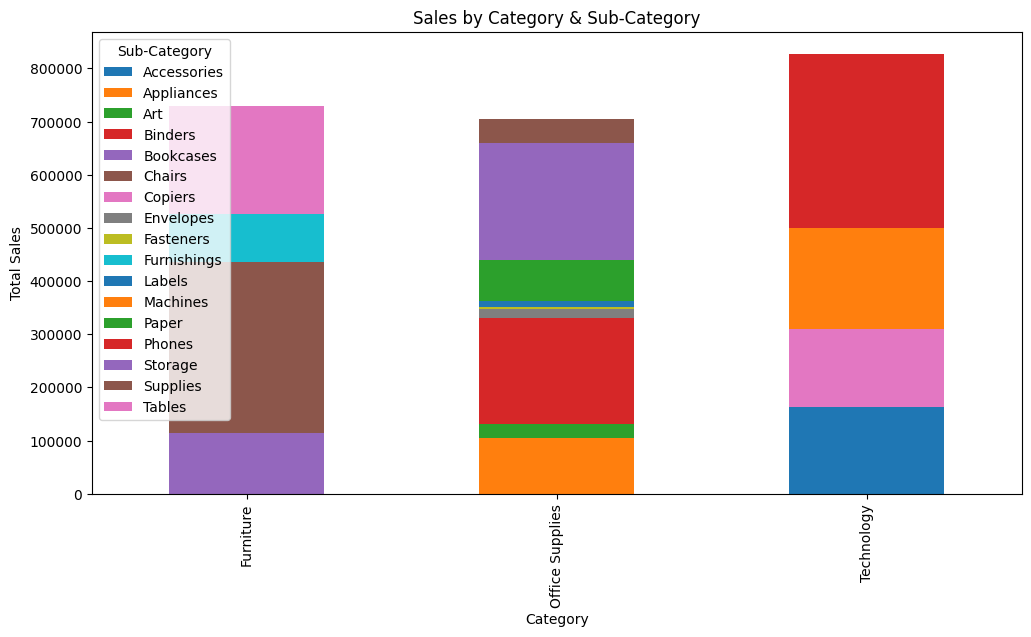

In [ ]:
category_sales = df.groupby(['Category','Sub-Category'])['Sales ($)'].sum().unstack()
category_sales.plot(kind='bar', figsize=(12,6), stacked=True, title='Sales by Category & Sub-Category')
plt.ylabel("Total Sales ($)")
plt.ylabel("Total Sales")
plt.show()

The above Figure indentifies which product Categories contribute most to profitability

C. Regional Sales Analysis

In [ ]:
region_sales = df.groupby(['Region'])['Sales ($)'].sum().sort_values(ascending=False)
region_sales.head()

,Sales ($)
Region,
West,710219.60
East,669518.79
Central,492646.78
South,389151.38


D. Monthly Sales Trends

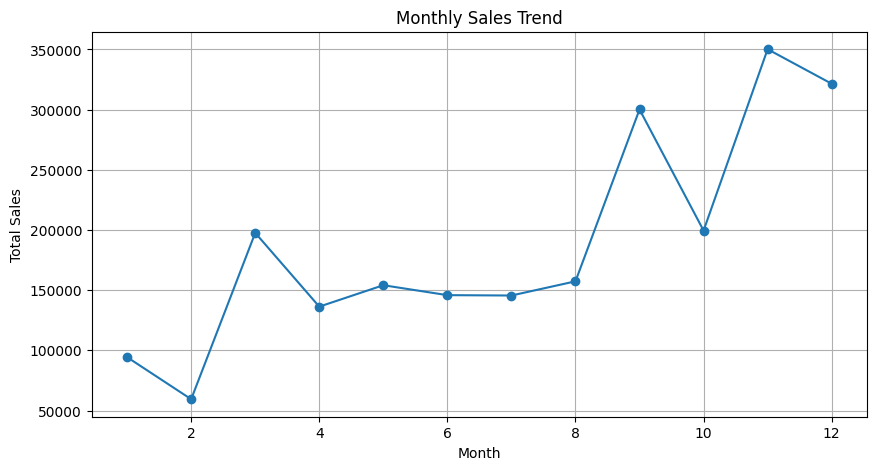

In [ ]:
monthly_sales = df.groupby('Month')['Sales ($)'].sum()

plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


The Above plot illustrates how sales fluctuate throughout the year

E. Customer Segmentation

In [ ]:
customer_sales = df.groupby(['Customer Name'])['Sales ($)'].sum().sort_values(ascending=False).head(10)
customer_sales.head(10)

,Sales ($)
Customer Name,
Sean Miller,25043.07
Tamara Chand,19052.22
Raymond Buch,15117.35
Tom Ashbrook,14595.62
Adrian Barton,14473.56
Ken Lonsdale,14175.22
Sanjit Chand,14142.34
Hunter Lopez,12873.30
Sanjit Engle,12209.44
